# S&P 500 Seasonal Exploratory Analysis

This notebook explores whether winter returns differ materially from summer returns within the S&P 500 dataset and visualizes seasonal patterns.


In [1]:
import sys
sys.path.append('../src')

from data_loader import load_sector_data, get_seasonal_returns
from stats_analysis import calculate_statistics, seasonal_ttest
from visualization import plot_seasonal_comparison, plot_monthly_averages

import pandas as pd
import numpy as np

print("✓ Modules loaded!")


✓ Modules loaded!


## Load S&P 500 data

Import the historical monthly return data from Excel so we can slice it into seasonal windows for analysis.


In [2]:
file_path = '../data/Seasonal S&P Data as of 11.13.2025 - Abhi.xlsx'
df_sp500 = load_sector_data(file_path, 'S&P500')
df_sp500.head()


,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
1970,-7.647187,5.269348,0.145251,-9.04831,-6.096663,-5.003266,7.329483,4.445868,3.299804,-1.140007,4.744745,5.676606
1971,4.047748,0.907384,3.679587,3.628751,-4.155844,0.07026,-4.132397,3.609542,-0.696759,-4.179378,-0.254696,8.617938
1972,1.812127,2.16471,0.591161,0.438433,1.727501,-2.182051,0.23334,3.445386,-0.486092,0.931705,4.561749,1.182823
1973,-1.711139,-3.74903,-0.143266,-4.079986,-1.88838,-0.657456,3.798197,-3.668453,4.009592,-0.129116,-11.386093,1.65694
1974,-1.004613,-0.362431,-2.327998,-3.905086,-3.35511,-1.466544,-7.77907,-9.027865,-11.933472,16.30469,-5.317997,-2.015149


## Compute seasonal return summaries

Calculate descriptive statistics for winter (November-April) and summer (May-October) return windows.


In [3]:
winter_returns = get_seasonal_returns(df_sp500, 'winter')
summer_returns = get_seasonal_returns(df_sp500, 'summer')

winter_stats = calculate_statistics(winter_returns)
summer_stats = calculate_statistics(summer_returns)

print("Winter stats:")
print(winter_stats)
print()
print("Summer stats:")
print(summer_stats)


Winter stats:
{'count': 334, 'mean': np.float64(1.0966160436656627), 'median': np.float64(1.3464737360778098), 'std': np.float64(4.243667431420813), 'min': np.float64(-12.51193208359566), 'max': np.float64(13.176694057893215), 'skewness': np.float64(-0.2601022226846744), 'kurtosis': np.float64(0.5997524016002767), 'positive_pct': np.float64(65.26946107784431)}

Summer stats:
{'count': 336, 'mean': np.float64(0.3889860356723042), 'median': np.float64(0.5660979572323486), 'std': np.float64(4.543511395412057), 'min': np.float64(-21.763042600130504), 'max': np.float64(16.304689959080903), 'skewness': np.float64(-0.5881426073056392), 'kurtosis': np.float64(2.250379160561849), 'positive_pct': np.float64(56.547619047619044)}


## Run statistical test

Use a paired t-test to measure whether the difference between winter and summer returns is statistically significant.


In [4]:
test_results = seasonal_ttest(winter_returns, summer_returns)
print("Paired t-test results:")
print(test_results)


Paired t-test results:
{'t_statistic': np.float64(2.083028618807852), 'p_value': np.float64(0.03762836945024296), 'significant_05': np.True_, 'significant_01': np.False_, 'cohens_d': np.float64(0.1609659730666033), 'mean_difference': np.float64(0.7076300079933584)}


## Visualize seasonal patterns

Plot a direct seasonal comparison as well as the average monthly returns to see when the spread is most pronounced.


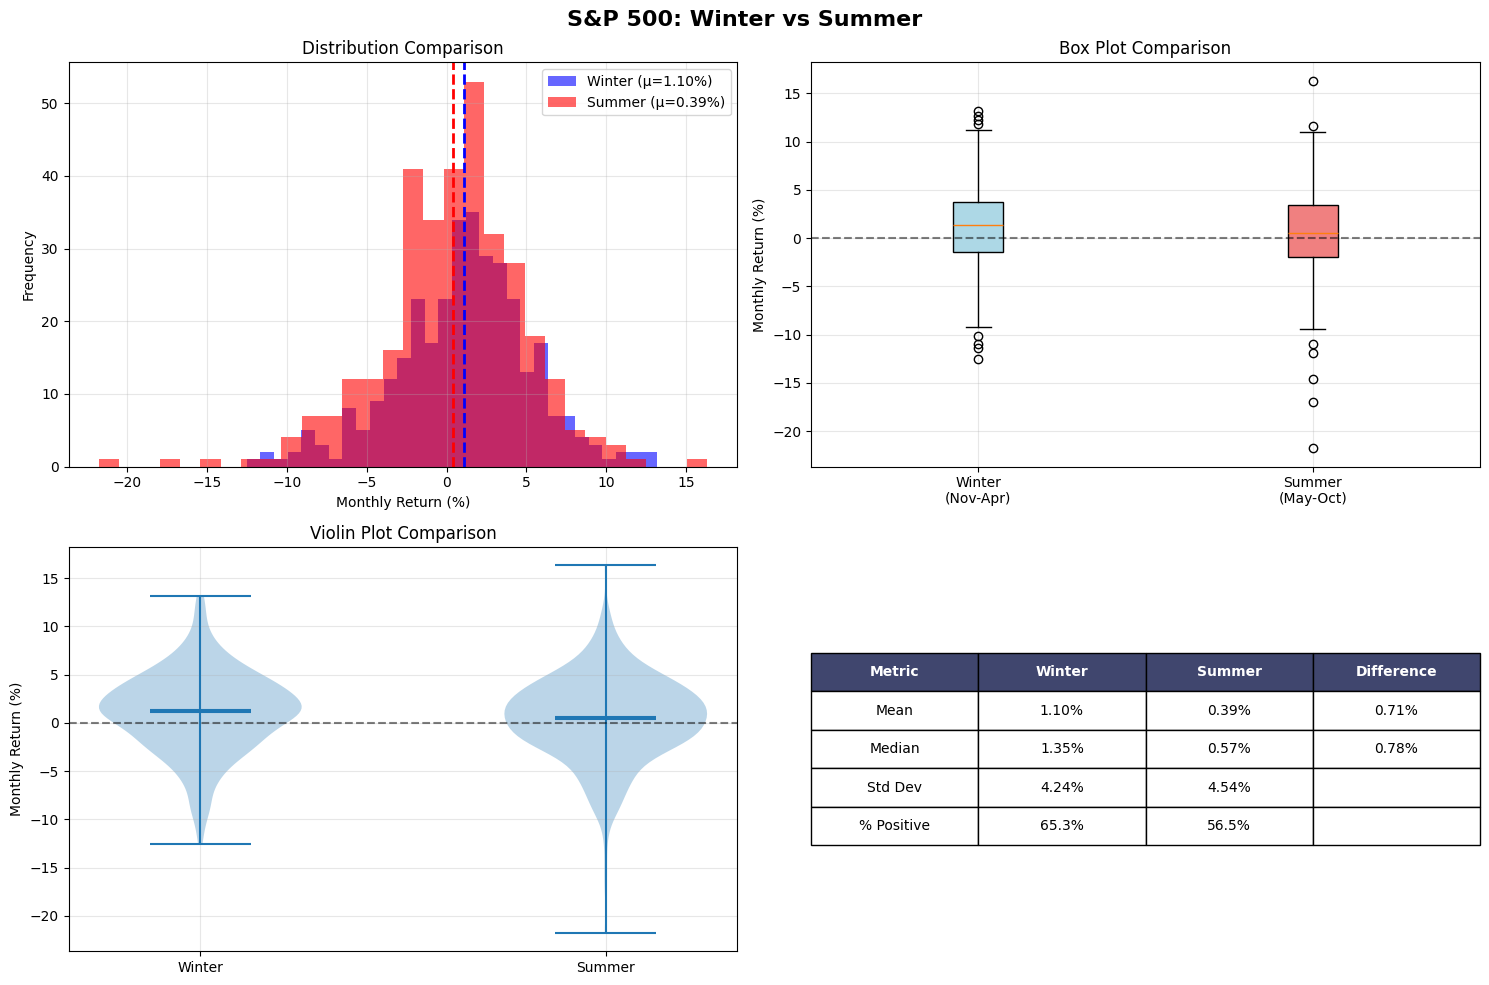

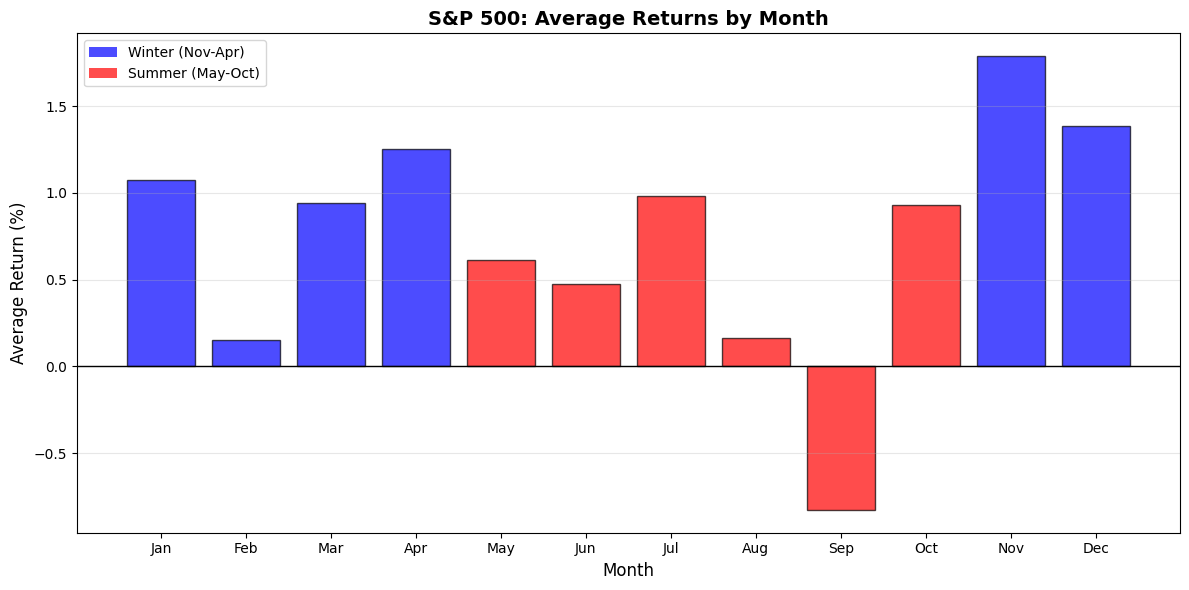

In [5]:
plot_seasonal_comparison(winter_returns, summer_returns, "S&P 500: Winter vs Summer")
plot_monthly_averages(df_sp500, "S&P 500: Average Returns by Month")


## Results & interpretation

Review the descriptive stats, t-test output, and charts above to understand the magnitude and consistency of the winter vs. summer effect. Pay special attention to the p-value and effect size alongside visual differences to decide if the seasonality is practically meaningful for the investment thesis.
